In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
training_data=pd.read_csv("Dataset/Flood/train.csv")
test_data=pd.read_csv("Dataset/Flood/test.csv")


In [50]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [52]:
training_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [53]:
test_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [54]:
training_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [55]:
df=pd.concat((training_data,test_data))
df.drop('id',axis=1,inplace=True)
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,...,6,1,3,5,6,4,4,6,6,NaN
745301,4,4,2,12,4,3,4,3,5,5,...,7,4,4,3,5,5,3,5,4,NaN
745302,5,7,9,5,5,6,7,5,5,3,...,11,3,11,4,5,9,5,5,4,NaN
745303,4,7,6,3,5,2,3,8,6,7,...,6,8,6,2,3,8,7,5,5,NaN


In [56]:
cols=df.columns[:-1]
cols

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

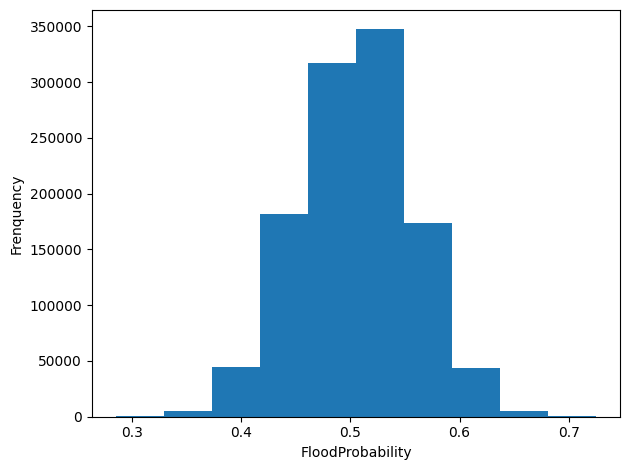

In [57]:
plt.hist(df.FloodProbability)
plt.xlabel("FloodProbability")
plt.ylabel("Frenquency")
plt.tight_layout()
plt.show()

<Axes: xlabel='FloodProbability', ylabel='count'>

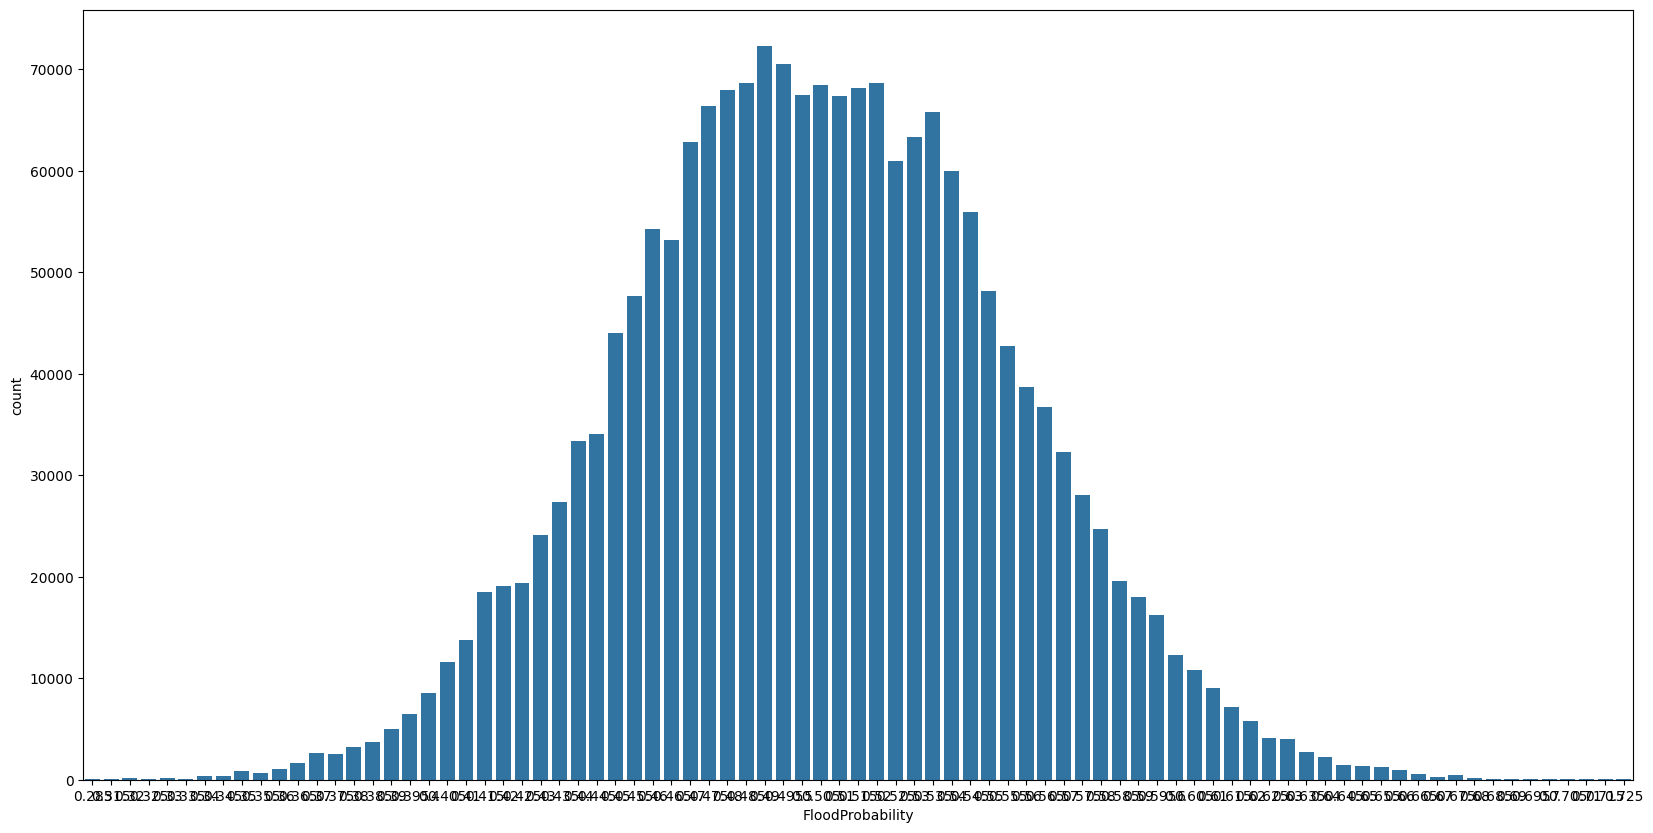

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(df,x='FloodProbability')

In [59]:
def to_analysis(df,cols,target_col="FloodProbability"):
    for col in cols:
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,2,1)
        sns.countplot(df,x=col,hue=col,dodge=False)

        plt.subplot(1,2,2)
        sns.boxplot(df,x=col)
        plt.tight_layout()
        plt.show()
        plt.close()

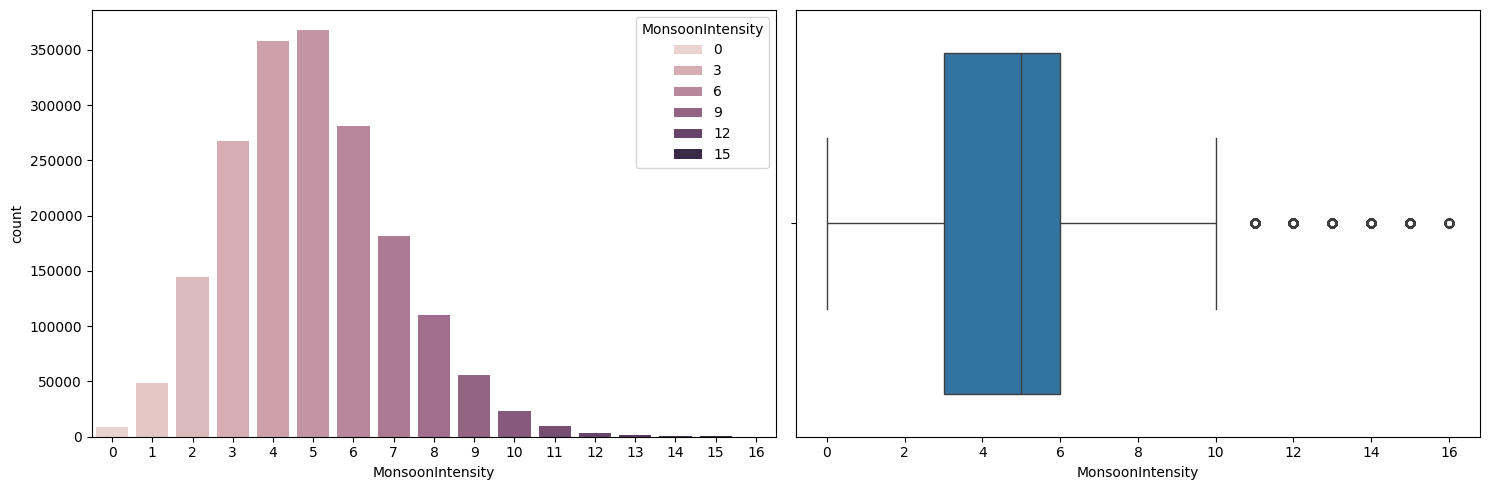

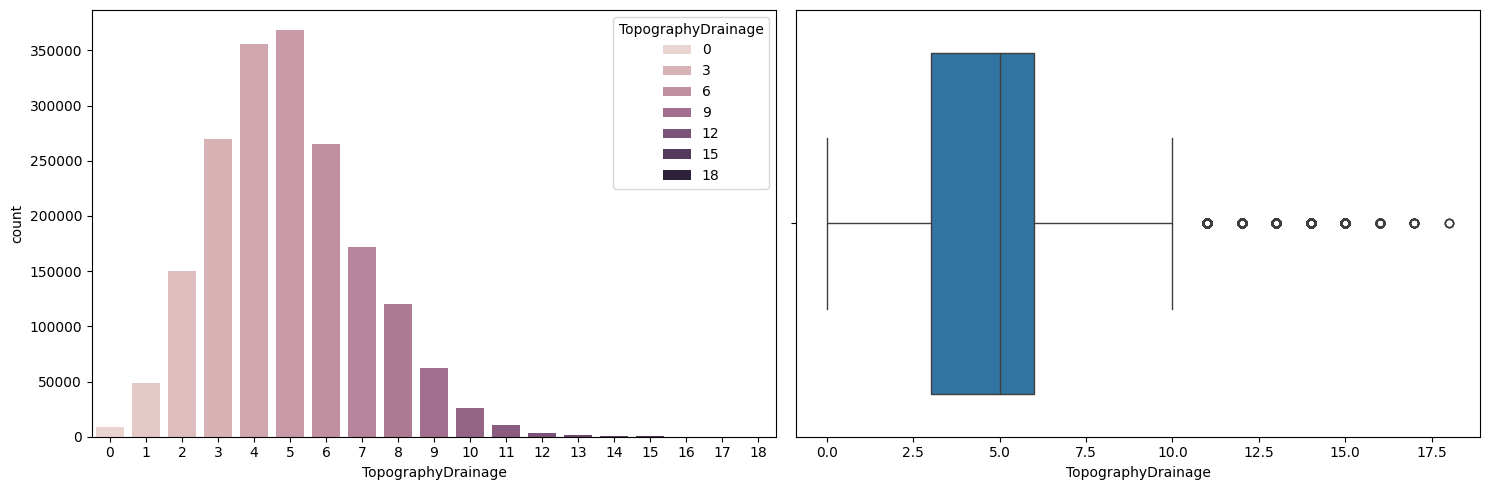

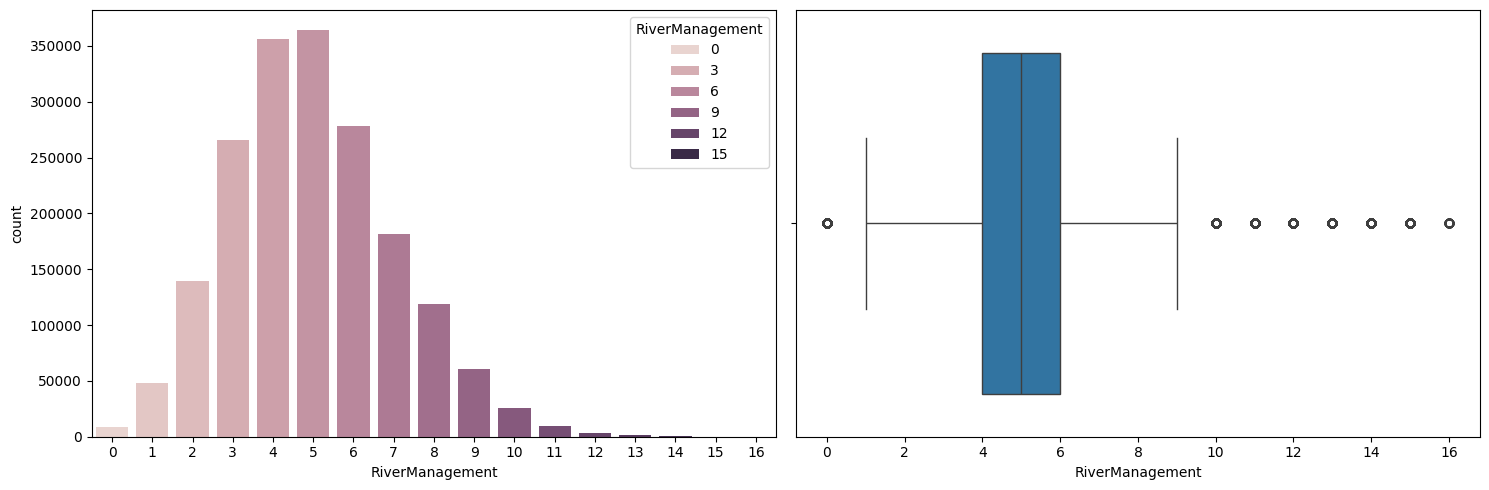

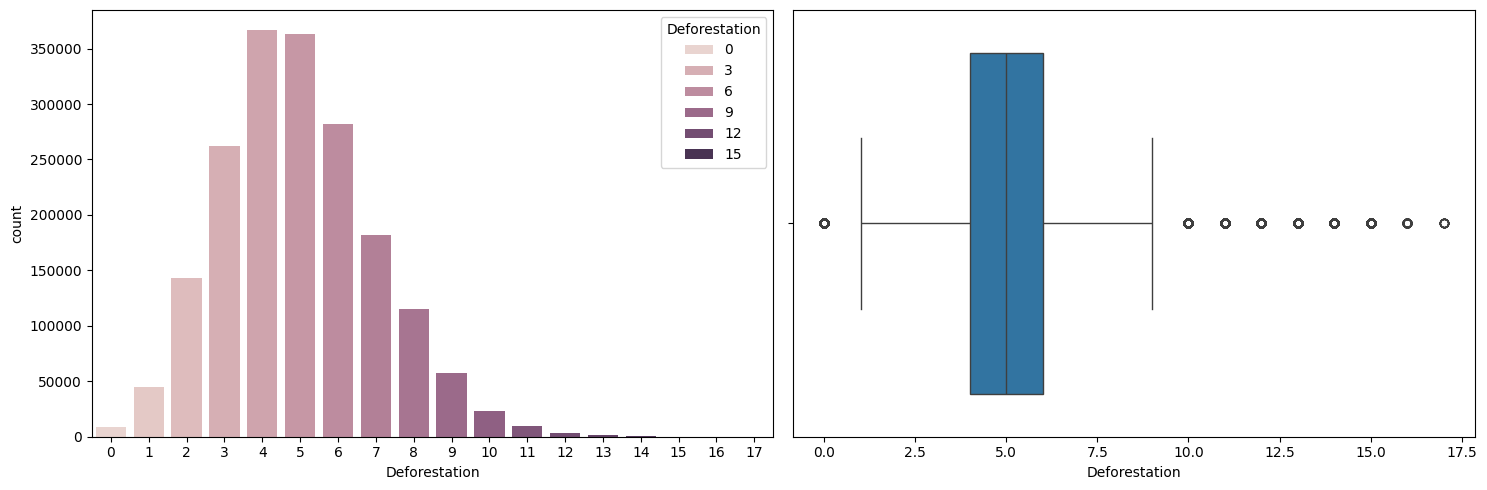

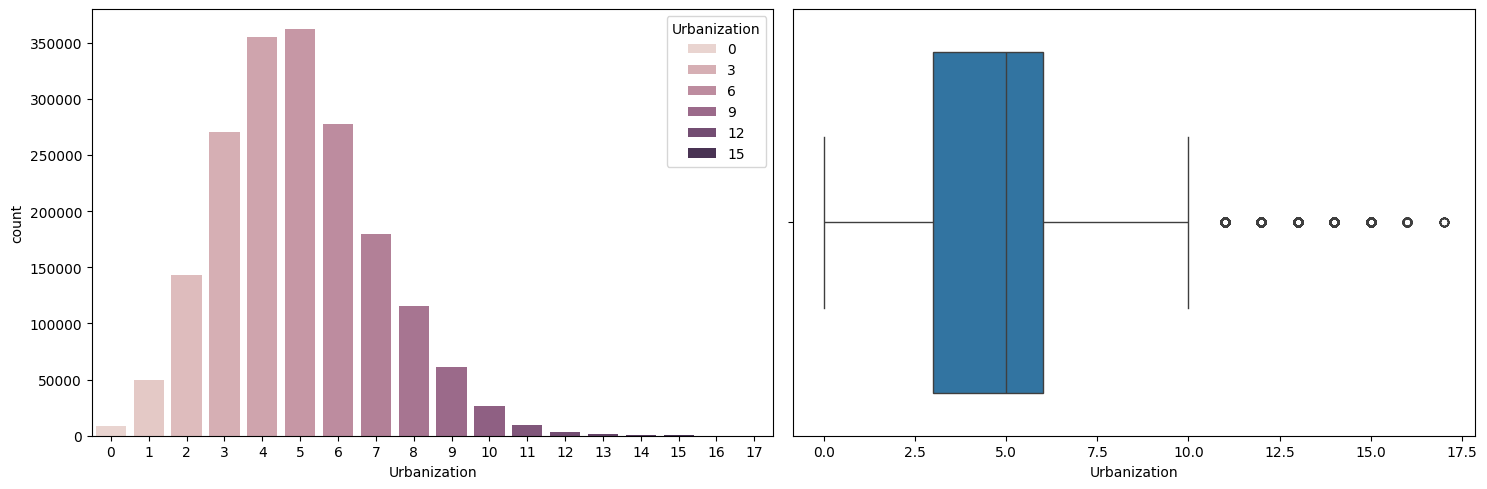

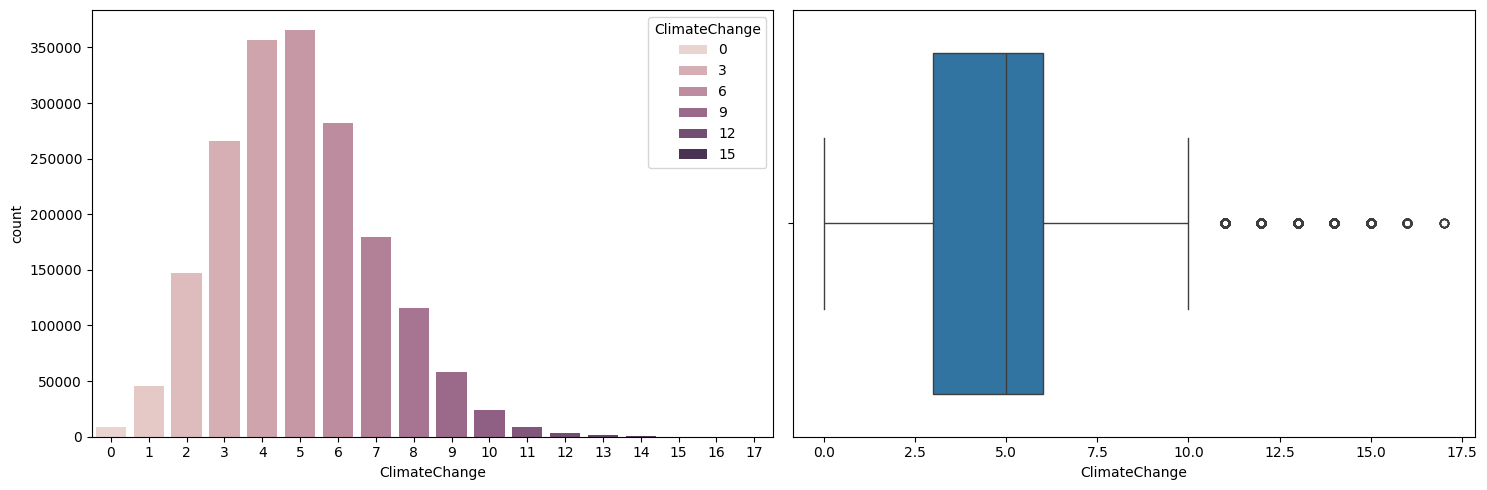

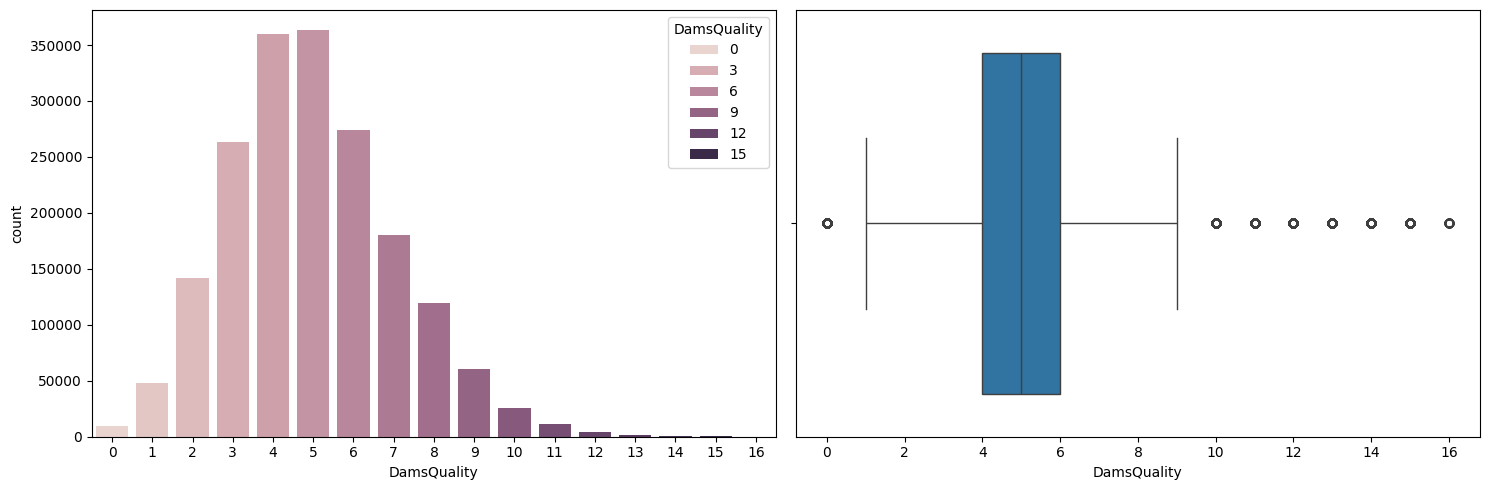

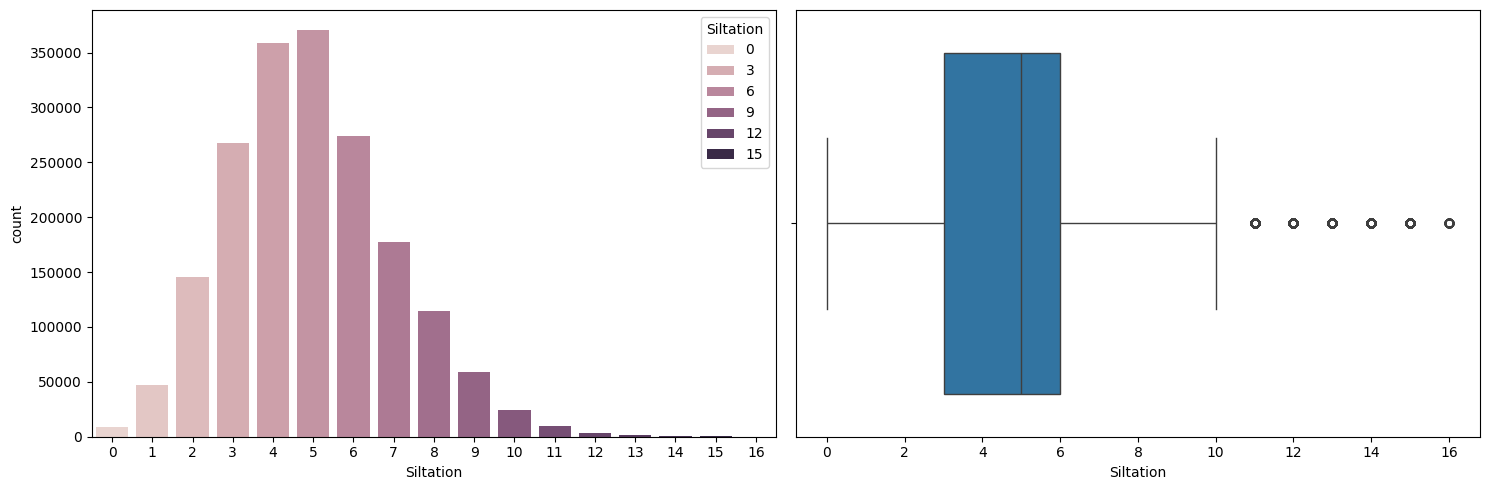

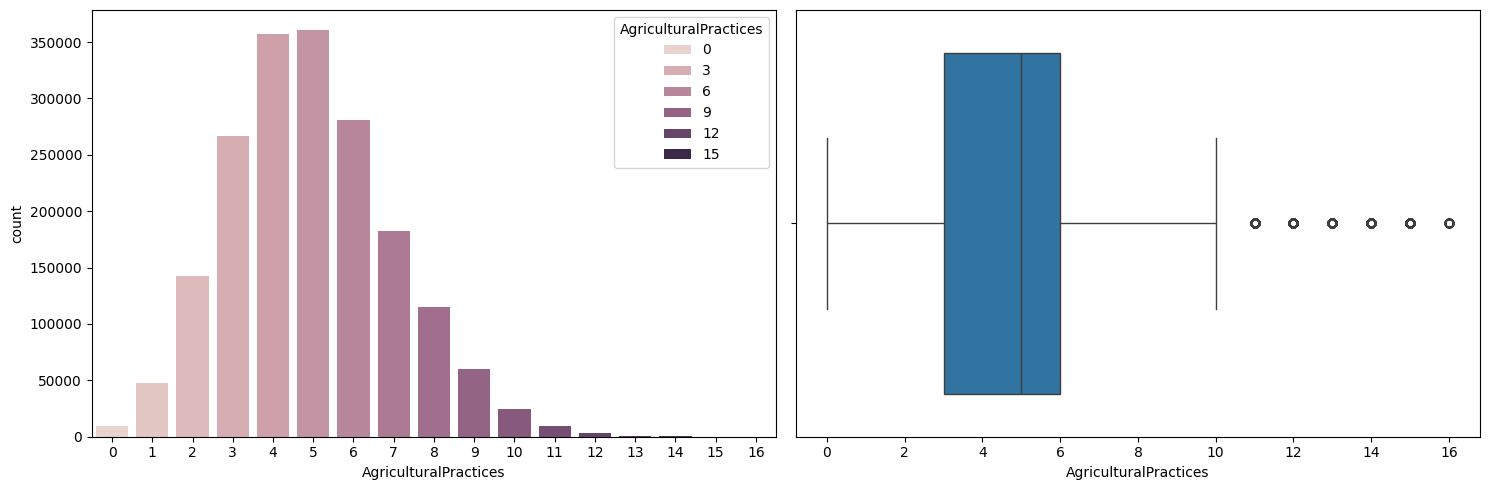

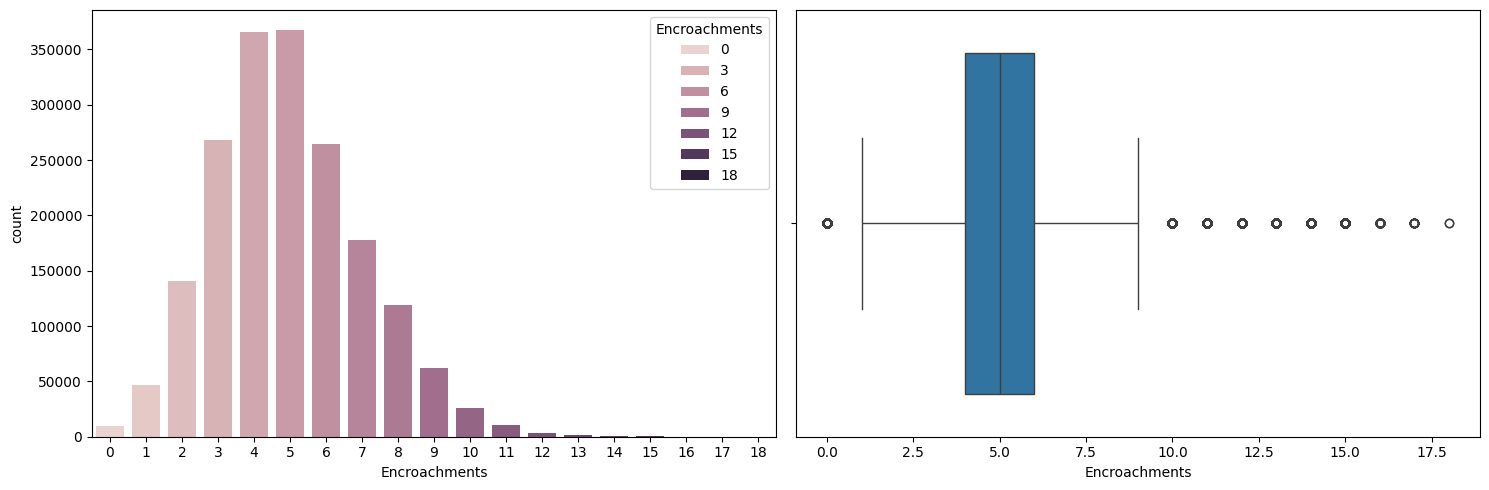

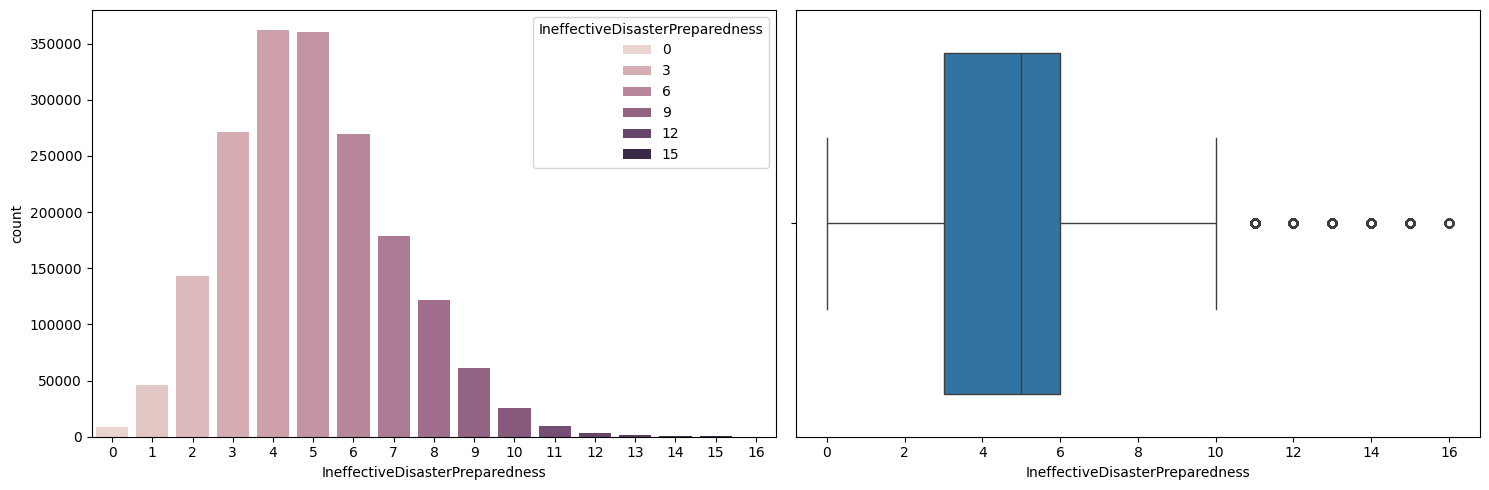

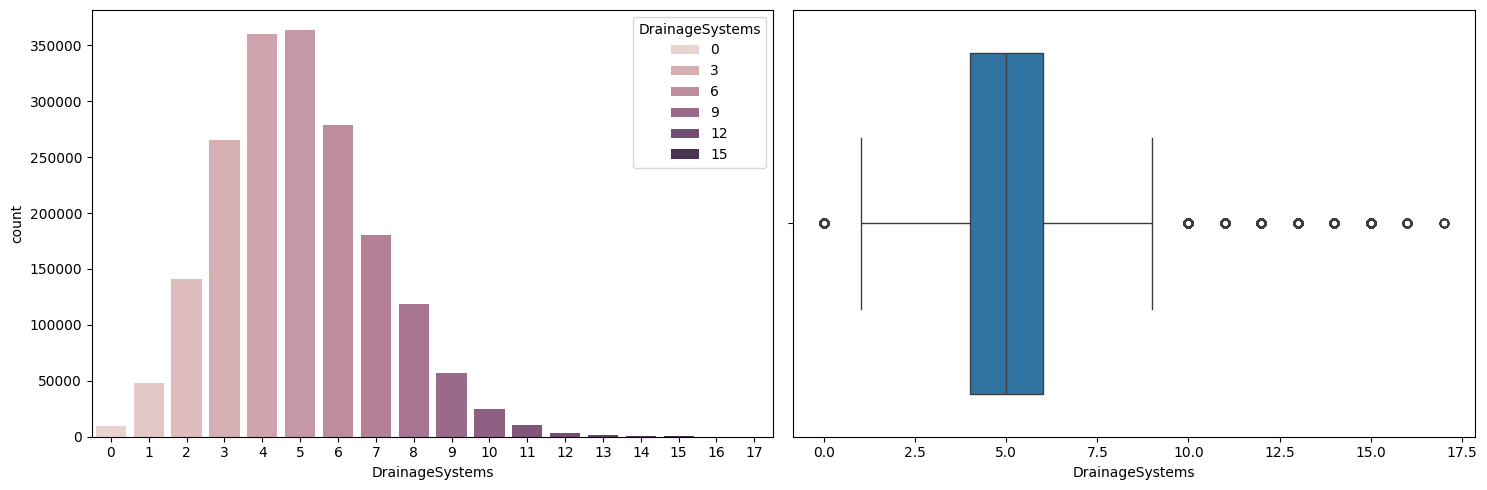

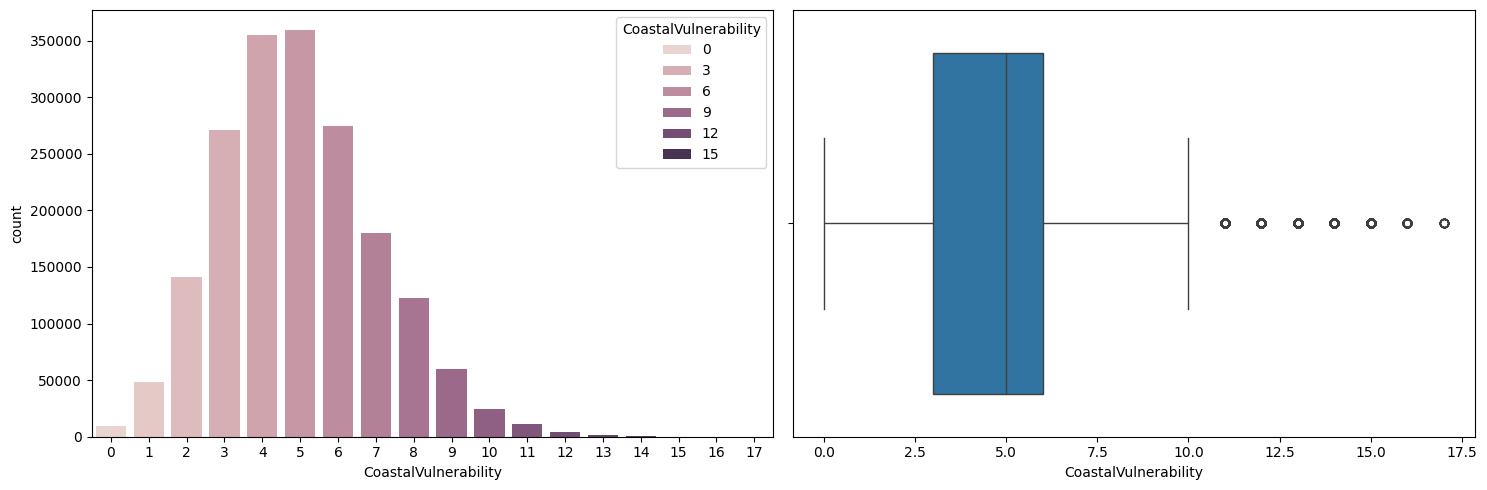

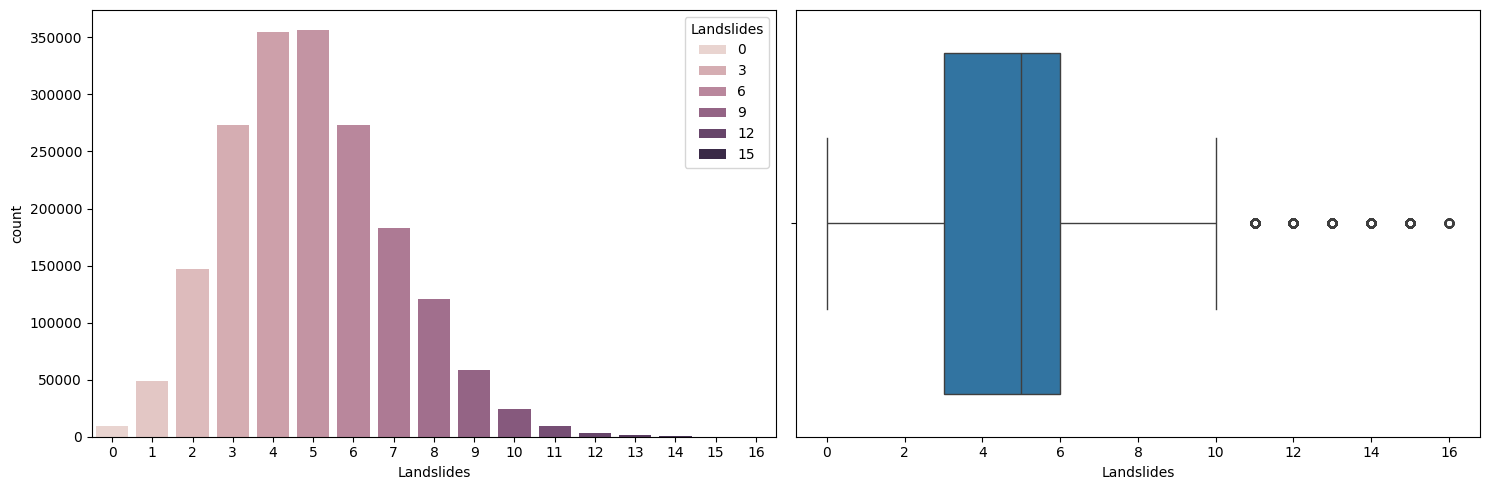

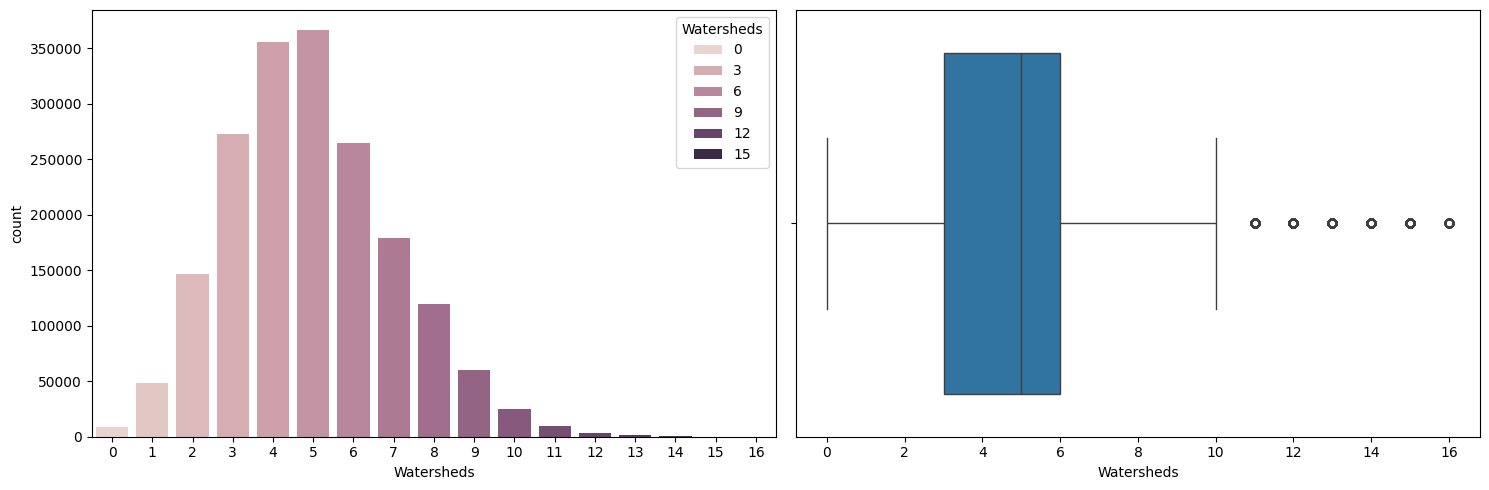

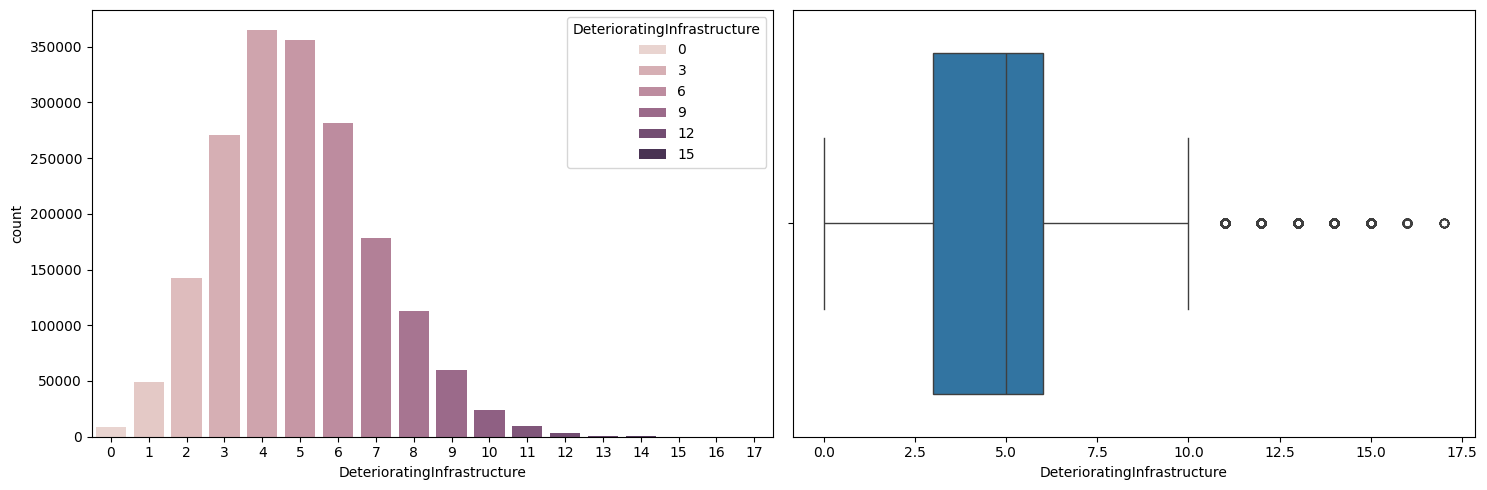

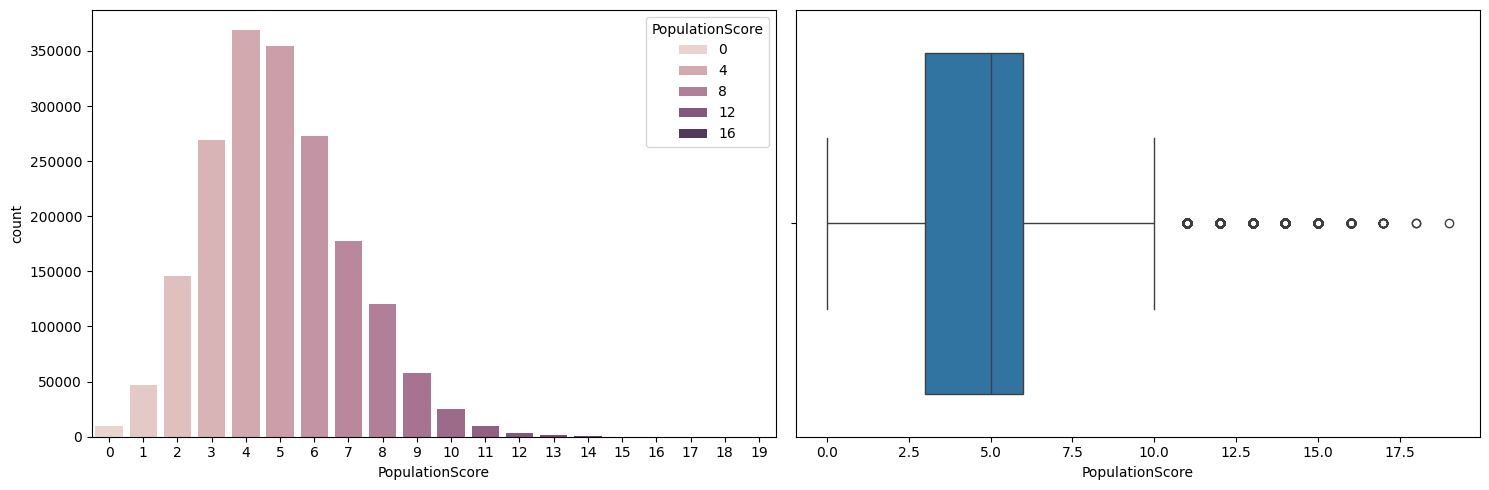

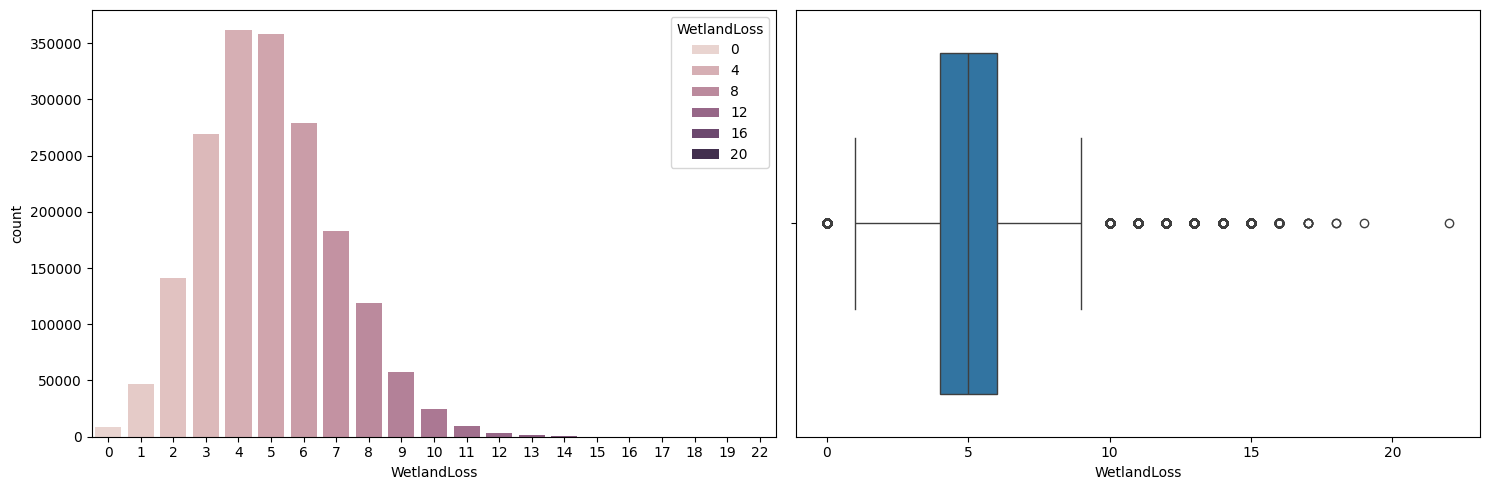

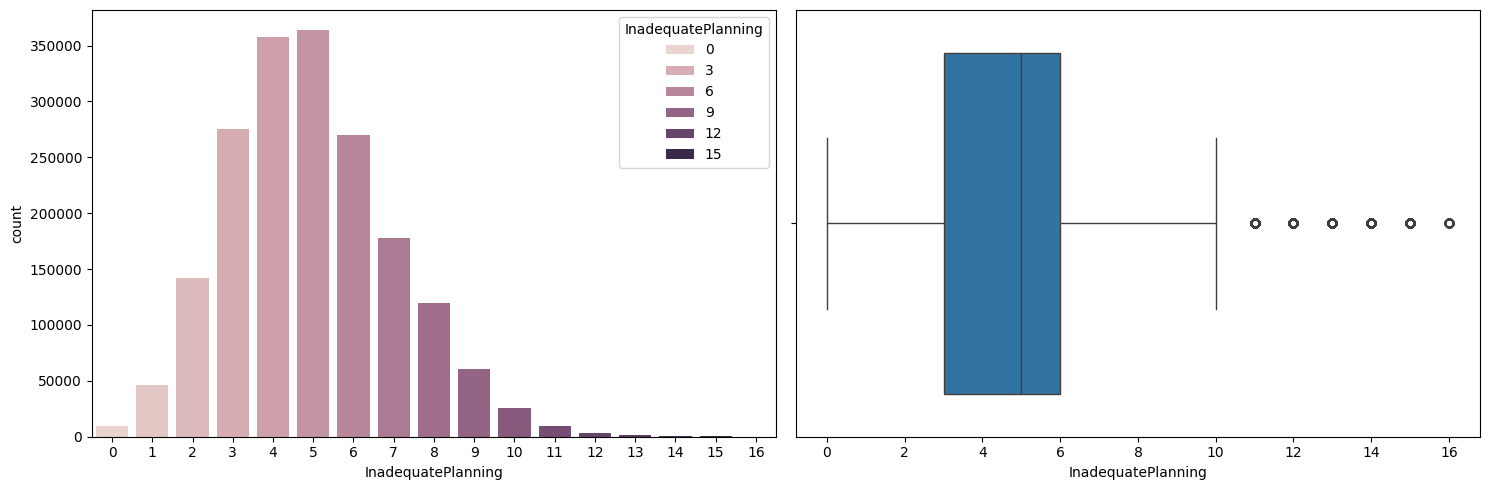

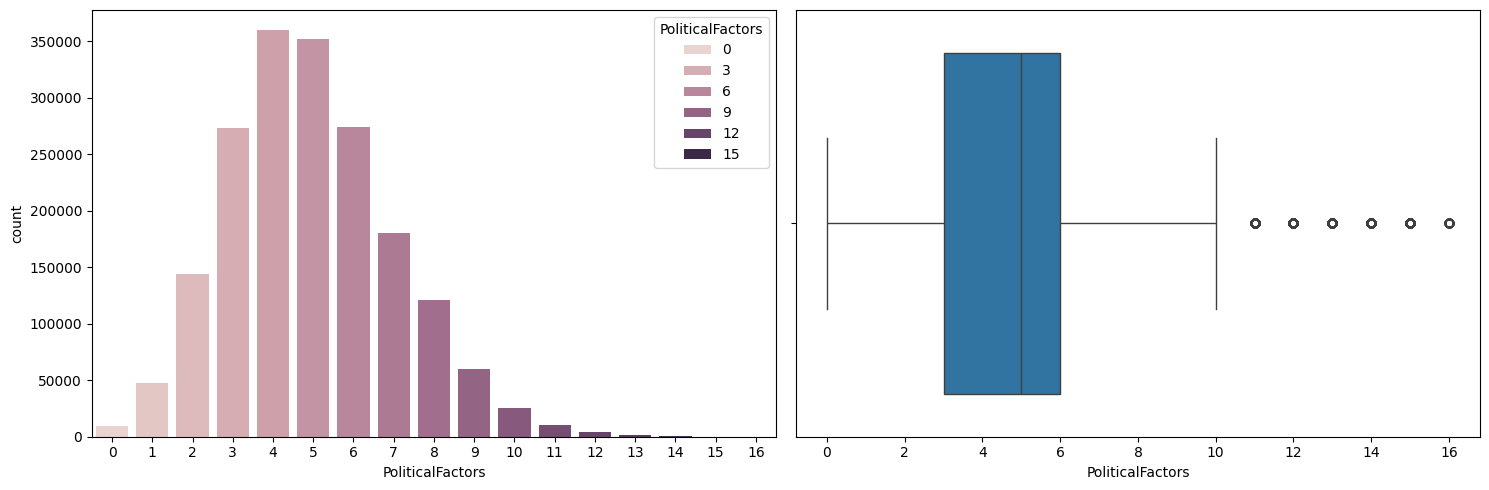

In [60]:
to_analysis(df,cols)

In [61]:
pd.DataFrame(df[cols].skew(), columns= ["skew"])

,skew
MonsoonIntensity,0.442604
TopographyDrainage,0.459388
RiverManagement,0.421438
Deforestation,0.436175
Urbanization,0.444870
ClimateChange,0.430080
DamsQuality,0.441276
Siltation,0.451439
AgriculturalPractices,0.419652
Encroachments,0.459940


In [62]:
train_corr_df=pd.DataFrame(training_data.corr()['FloodProbability'])
train_corr_df

,FloodProbability
id,-0.000184
MonsoonIntensity,0.189098
TopographyDrainage,0.187635
RiverManagement,0.187131
Deforestation,0.184001
Urbanization,0.180861
ClimateChange,0.184761
DamsQuality,0.187996
Siltation,0.186789
AgriculturalPractices,0.183366


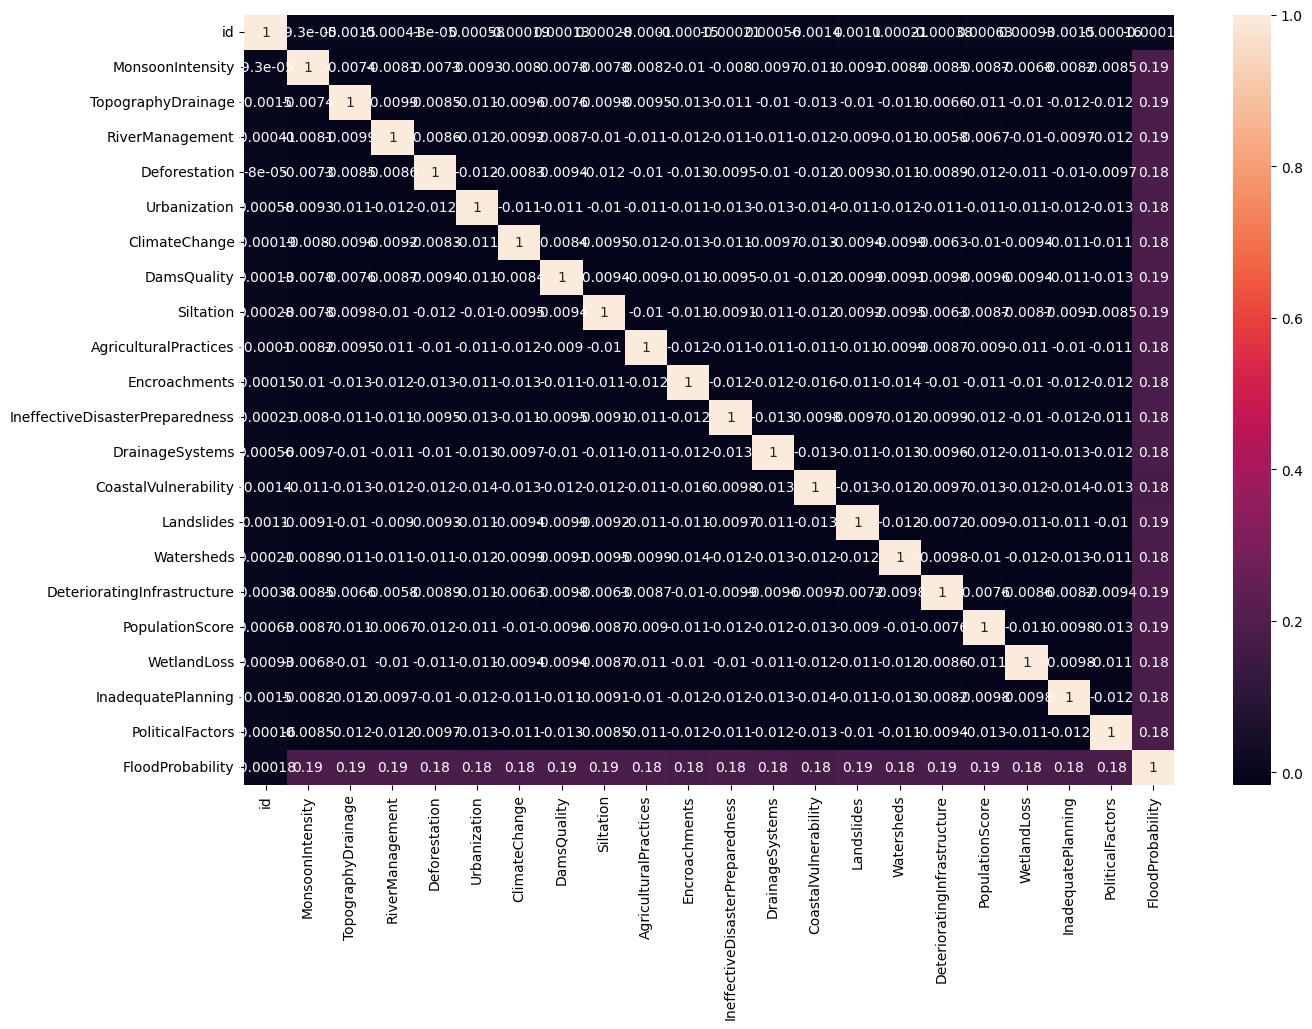

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(training_data.corr(),annot=True)
plt.show()

In [64]:
sample=pd.DataFrame(training_data.FloodProbability)
df.drop("FloodProbability",axis=1,inplace=True)

In [65]:
sample

,FloodProbability
0,0.445
1,0.450
2,0.530
3,0.535
4,0.415
...,...
1117952,0.495
1117953,0.480
1117954,0.485
1117955,0.495


In [66]:
for i in range(0,len(cols)):
    col1=cols[i]
    for j in range(i,len(cols)):
        col2=cols[j]
        sample['Mean']=(training_data[col1]+training_data[col2])/2
        corr=sample.corr()
        
        
        print(f"corr of mean between {col1} and {col2 } :")
        print(corr)

corr of mean between MonsoonIntensity and MonsoonIntensity :
                  FloodProbability      Mean
FloodProbability          1.000000  0.189098
Mean                      0.189098  1.000000
corr of mean between MonsoonIntensity and TopographyDrainage :
                  FloodProbability      Mean
FloodProbability          1.000000  0.267356
Mean                      0.267356  1.000000
corr of mean between MonsoonIntensity and RiverManagement :
                  FloodProbability      Mean
FloodProbability          1.000000  0.267107
Mean                      0.267107  1.000000
corr of mean between MonsoonIntensity and Deforestation :
                  FloodProbability      Mean
FloodProbability          1.000000  0.264787
Mean                      0.264787  1.000000
corr of mean between MonsoonIntensity and Urbanization :
                  FloodProbability      Mean
FloodProbability          1.000000  0.262783
Mean                      0.262783  1.000000
corr of mean between Monso

In [67]:
df['MonsoonIntensity_DeterioratingInfrastructure']=(df['MonsoonIntensity']+df["DeterioratingInfrastructure"])/2
df['TopographyDrainage_DamsQuality']=(df['TopographyDrainage']+df['DamsQuality'])/2
df['RiverManagement_Siltation']=(df['RiverManagement']+df['Siltation'])/2
df['Deforestation_AgriculturalPractices']=(df['Deforestation']+df['AgriculturalPractices'])/2
df['Urbanization_Landslides']=(df['Urbanization']+df['Landslides'])/2
df['ClimateChange_IneffectiveDisasterPreparedness']=(df['IneffectiveDisasterPreparedness']+df['ClimateChange'])/2
df['ClimateChange_WetLandLoss']=(df['ClimateChange']+df['WetlandLoss'])/2
df['DamsQuality_Siltation']=(df['DamsQuality']+df['Siltation'])/2
df['Watersheds_PopulationScore']=(df['PopulationScore']+df['Watersheds'])/2


In [68]:
df['mean']=0.1*df[cols].mean(axis=1)
df['var']=0.1*df[cols].var(axis=1)
df['std']=0.1*df[cols].std(axis=1)
df['skew']=df[cols].skew(axis=1)
df['cv']=df['std']/df['mean']


In [69]:
df['geom_mean'] = 0.1 * np.exp(np.log(df[cols]+1).mean(axis=1))
df['harm_mean'] = 0.1 * len(cols) / (1 / (df[cols]+1)).sum(axis=1)

In [70]:
df['double'] = 0.1 * np.sqrt(np.sum(np.tril(df[cols].to_numpy()[:, :, None] * df[cols].to_numpy()[:, None, :], k=-1), axis=(1,2)) /380)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df[cols]=scaler.fit_transform(df[cols])



In [72]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DamsQuality_Siltation,Watersheds_PopulationScore,mean,var,std,skew,cv,geom_mean,harm_mean,double
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,...,3.5,6.0,0.470,0.306316,0.175019,0.577258,0.372380,0.545370,0.521955,0.331186
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,...,4.0,3.0,0.470,0.527368,0.229645,0.148339,0.488606,0.515494,0.437196,0.330351
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,...,3.0,6.5,0.495,0.373421,0.193241,-0.408083,0.390386,0.558789,0.515127,0.348682
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,...,5.5,5.0,0.520,0.269474,0.164157,0.120566,0.315686,0.598319,0.575408,0.366778
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,...,3.0,3.5,0.360,0.225263,0.150088,0.253227,0.416910,0.435940,0.411361,0.253450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,0.039335,-0.443233,1.468530,-0.947235,0.028386,-0.453698,-0.458827,0.034964,0.027194,0.024110,...,4.5,4.5,0.470,0.211579,0.145458,-0.328351,0.309484,0.548384,0.519588,0.331543
745301,-0.446964,-0.443233,-1.427222,3.438614,-0.451746,-0.939526,-0.458827,-0.932697,0.027194,0.024110,...,3.5,4.0,0.445,0.436579,0.208945,2.674538,0.469539,0.518084,0.497687,0.312923
745302,0.039335,0.989450,1.951156,0.027398,0.028386,0.517958,0.979632,0.034964,0.027194,-0.936185,...,6.0,6.5,0.600,0.547368,0.233959,1.041164,0.389932,0.666961,0.637813,0.422648
745303,-0.446964,0.989450,0.503280,-0.947235,0.028386,-1.425354,-0.938314,1.486457,0.510172,0.984405,...,5.5,5.0,0.535,0.381842,0.195408,-0.360800,0.365248,0.601959,0.565086,0.377038


In [73]:
df[['MonsoonIntensity_DeterioratingInfrastructure','TopographyDrainage_DamsQuality','RiverManagement_Siltation','Deforestation_AgriculturalPractices','Urbanization_Landslides','ClimateChange_IneffectiveDisasterPreparedness','ClimateChange_WetLandLoss','DamsQuality_Siltation','Watersheds_PopulationScore']]=scaler.fit_transform(df[['MonsoonIntensity_DeterioratingInfrastructure','TopographyDrainage_DamsQuality','RiverManagement_Siltation','Deforestation_AgriculturalPractices','Urbanization_Landslides','ClimateChange_IneffectiveDisasterPreparedness','ClimateChange_WetLandLoss','DamsQuality_Siltation','Watersheds_PopulationScore']])

In [74]:
X=df[0:1117957]
test_set=df[1117957:]


In [75]:
X=X.join(training_data['FloodProbability'])

In [76]:
X

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,Watersheds_PopulationScore,mean,var,std,skew,cv,geom_mean,harm_mean,double,FloodProbability
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,...,0.732916,0.470,0.306316,0.175019,0.577258,0.372380,0.545370,0.521955,0.331186,0.445
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,...,-1.319115,0.470,0.527368,0.229645,0.148339,0.488606,0.515494,0.437196,0.330351,0.450
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,...,1.074922,0.495,0.373421,0.193241,-0.408083,0.390386,0.558789,0.515127,0.348682,0.530
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,...,0.048906,0.520,0.269474,0.164157,0.120566,0.315686,0.598319,0.575408,0.366778,0.535
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,...,-0.977109,0.360,0.225263,0.150088,0.253227,0.416910,0.435940,0.411361,0.253450,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,-0.933262,-0.920793,-0.461971,2.463981,-0.451746,0.032130,0.020659,1.002626,2.442082,-0.456037,...,-2.345130,0.495,0.647105,0.254383,0.616174,0.513904,0.543501,0.492515,0.347699,0.495
1117953,-1.419560,-1.398354,-0.461971,-0.947235,1.948913,0.032130,1.459119,-1.900359,-0.938761,0.024110,...,-0.977109,0.480,0.585263,0.241922,0.606652,0.504004,0.532491,0.485502,0.337249,0.480
1117954,1.011931,-0.920793,1.951156,-0.459918,0.508518,0.032130,1.938605,-1.900359,-0.938761,-0.456037,...,0.048906,0.490,0.388421,0.197084,0.383184,0.402212,0.555756,0.515812,0.345078,0.485
1117955,1.011931,-0.920793,-0.944596,1.002031,0.028386,-1.425354,-0.938314,-0.448867,0.510172,-0.456037,...,-0.293099,0.495,0.289211,0.170062,0.014803,0.343559,0.570594,0.545396,0.348983,0.495


In [77]:
corr=pd.DataFrame(X.corr()['FloodProbability'].drop("FloodProbability"))
print(corr)

                                               FloodProbability
MonsoonIntensity                                       0.189098
TopographyDrainage                                     0.187635
RiverManagement                                        0.187131
Deforestation                                          0.184001
Urbanization                                           0.180861
ClimateChange                                          0.184761
DamsQuality                                            0.187996
Siltation                                              0.186789
AgriculturalPractices                                  0.183366
Encroachments                                          0.178841
IneffectiveDisasterPreparedness                        0.183109
DrainageSystems                                        0.179305
CoastalVulnerability                                   0.177774
Landslides                                             0.185346
Watersheds                              

In [78]:
corr_more_02 = list(corr[(corr > 0.2) | (corr < -0.2)].dropna().index)



In [79]:
corr_more_02

['MonsoonIntensity_DeterioratingInfrastructure',
 'TopographyDrainage_DamsQuality',
 'RiverManagement_Siltation',
 'Deforestation_AgriculturalPractices',
 'Urbanization_Landslides',
 'ClimateChange_IneffectiveDisasterPreparedness',
 'ClimateChange_WetLandLoss',
 'DamsQuality_Siltation',
 'Watersheds_PopulationScore',
 'mean',
 'cv',
 'geom_mean',
 'harm_mean',
 'double']

In [80]:
df['mean_highest'] = 0.1 * df[corr_more_02].mean(axis=1)



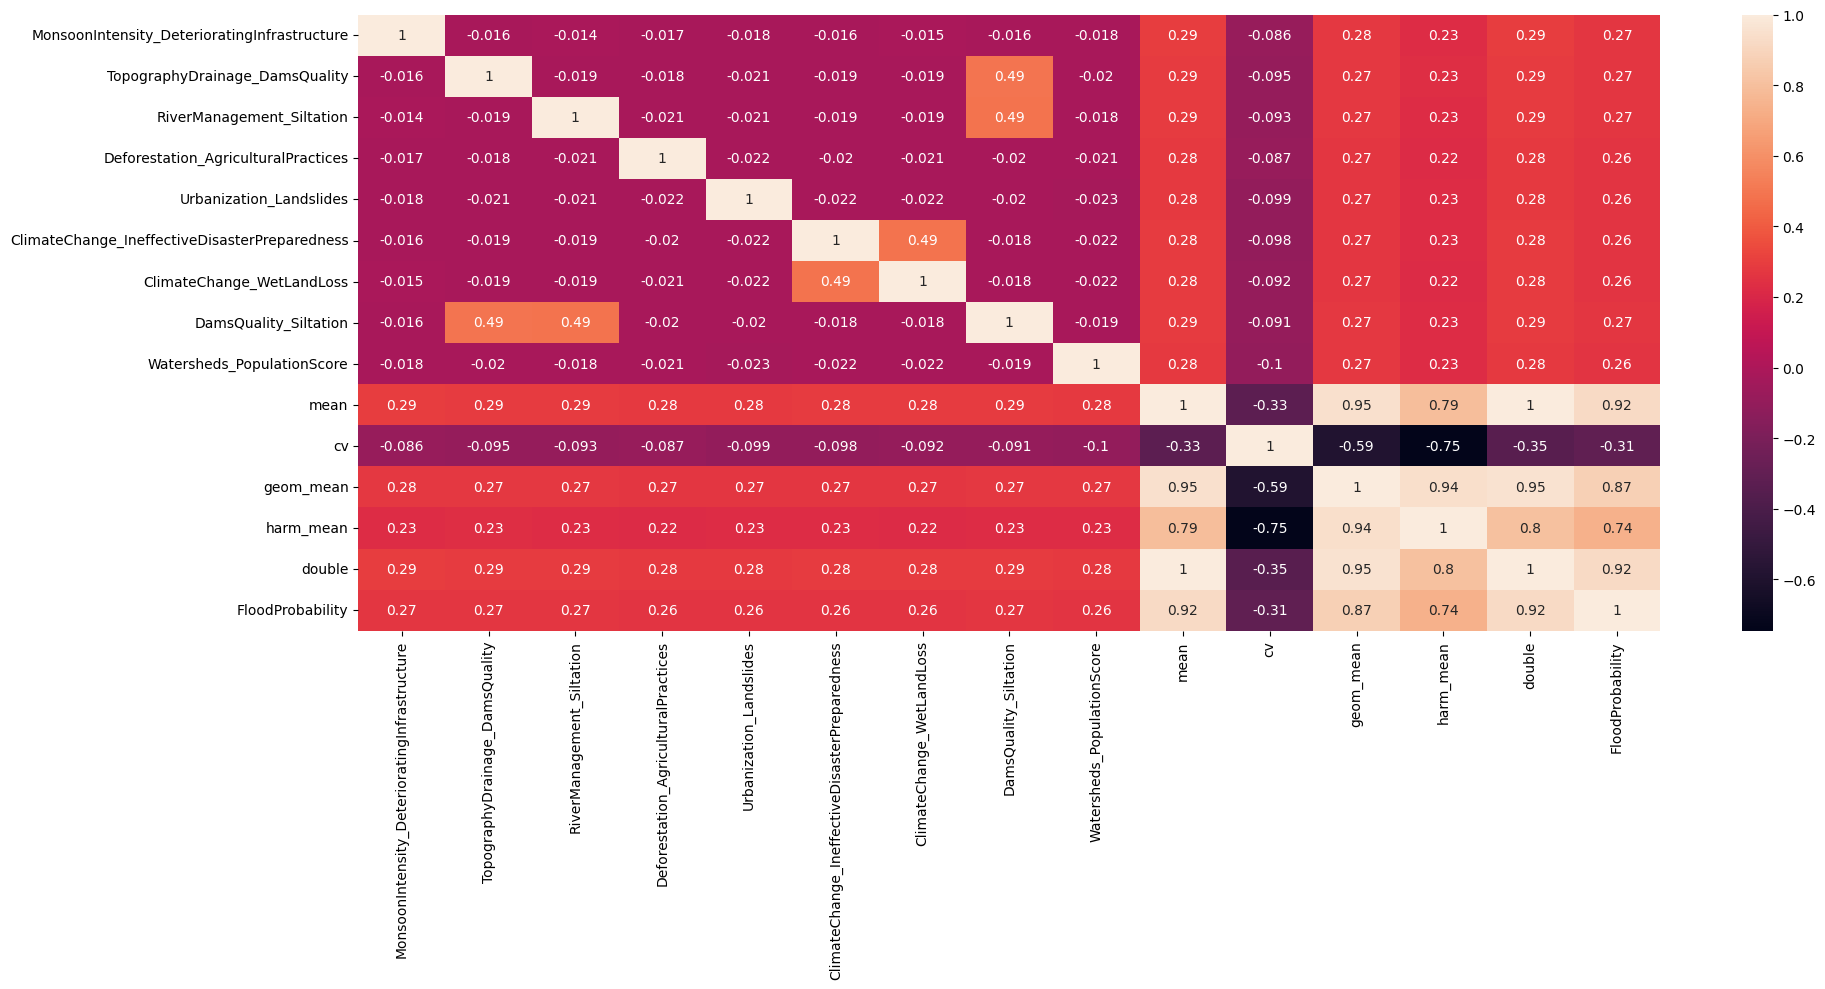

In [81]:
plt.figure(figsize=(21,8))
sns.heatmap(X[corr_more_02].join(training_data['FloodProbability']).corr(), annot=True,)
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

y=X['FloodProbability']
X.drop("FloodProbability",axis=1,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [83]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [84]:
LG_model = LGBMRegressor(boosting_type = 'gbdt', 
                         n_estimators=2000, 
                         learning_rate =  0.012,
                         num_leaves = 250, 
                         subsample_for_bin= 165700, 
                         min_child_samples= 114, 
                         reg_alpha= 2.075e-06, 
                         reg_lambda= 3.839e-07, 
                         colsample_bytree= 0.9634,
                         subsample= 0.9592, 
                         max_depth= 10,
                         random_state=0,
                         verbosity=-1)
LG_model.fit(X_train, y_train)

y_pred = LG_model.predict(X_test)
print(f"Training score {LG_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
LGReg_score = r2_score(y_test,y_pred)
LGReg_Tscore = LG_model.score(X_train,y_train)

Training score 0.8761882526191057
R2: 0.8683795415357589


In [85]:
X_train.shape

(894365, 37)

In [86]:
test_set.shape

(745305, 37)

In [87]:
pred=LG_model.predict(test_set)

In [88]:
output = pd.DataFrame({'id': test_data.id, 'FloodProbability':pred})
output.to_csv('submission.csv', index=False)
x=pd.read_csv('submission.csv')